In [11]:
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt


In [12]:
fits_path = 'Image_fits/'
dat_path = '../matching_tables/five_and_half_arcmin_match.dat'
eFEDS_srcs_path = '../matching_tables/eFEDS_sources_filtered.csv'
matches_table = Table.read(dat_path, format='ascii')
eFEDS_table = Table.read(eFEDS_srcs_path, format='csv')


In [13]:
def add_marker(wcs, ra, dec, is_target=False, label='None'):
    x, y = wcs.world_to_pixel(SkyCoord(ra, dec, unit='deg'))

    if is_target:
        plt.scatter(x, y, c="None", edgecolors="white",
                    s=200, alpha=0.5, label=label)
    else:
        plt.scatter(x, y, c="None", edgecolors="red",
                    s=100, alpha=0.5, label=label)
    return

def add_eFEDS_marker(wcs, ra, dec,label='None'):
    x, y = wcs.world_to_pixel(SkyCoord(ra, dec, unit='deg'))
    plt.scatter(x, y, c="None", edgecolors="lime",
            s=80, alpha=0.6, label=label)

In [14]:

def mark_image_eFEDS(cluster_id, matches_table=matches_table, eFEDS_table=eFEDS_table, make_save=False):
    cluster = matches_table[matches_table['clus_ID_SRC'] == cluster_id]
    eFEDS_sources = eFEDS_table[eFEDS_table['clus_ID_SRC'] == cluster_id]
    image, header = fits.getdata(
        fits_path+"image_"+str(cluster_id)+".fits", header=True)

    w = WCS(header)

    plt.figure(dpi=300)

    plt.imshow(image, origin='lower')

    plt.title("eFEDS {ID} with quasars and eFEDS sources marked".format(
        ID=str(cluster["clus_ID_SRC"][0])))

    add_marker(w, cluster['clus_RA'][0], cluster['clust_DEC'][0],
               is_target=True, label="eFEDS "+str(cluster["clus_ID_SRC"][0]))

    for source in cluster:
        add_marker(w, source['ra'], source['dec'],
                   label="source_id "+str(source["source_id"]))

    for source in eFEDS_sources:
        add_eFEDS_marker(w, source['src_RA'], source['src_DEC'])
    if make_save:
        plt.savefig("Images/eFEDS_"+str(cluster_id)+"_with_markers_and_eFEDS.png")
    plt.show()


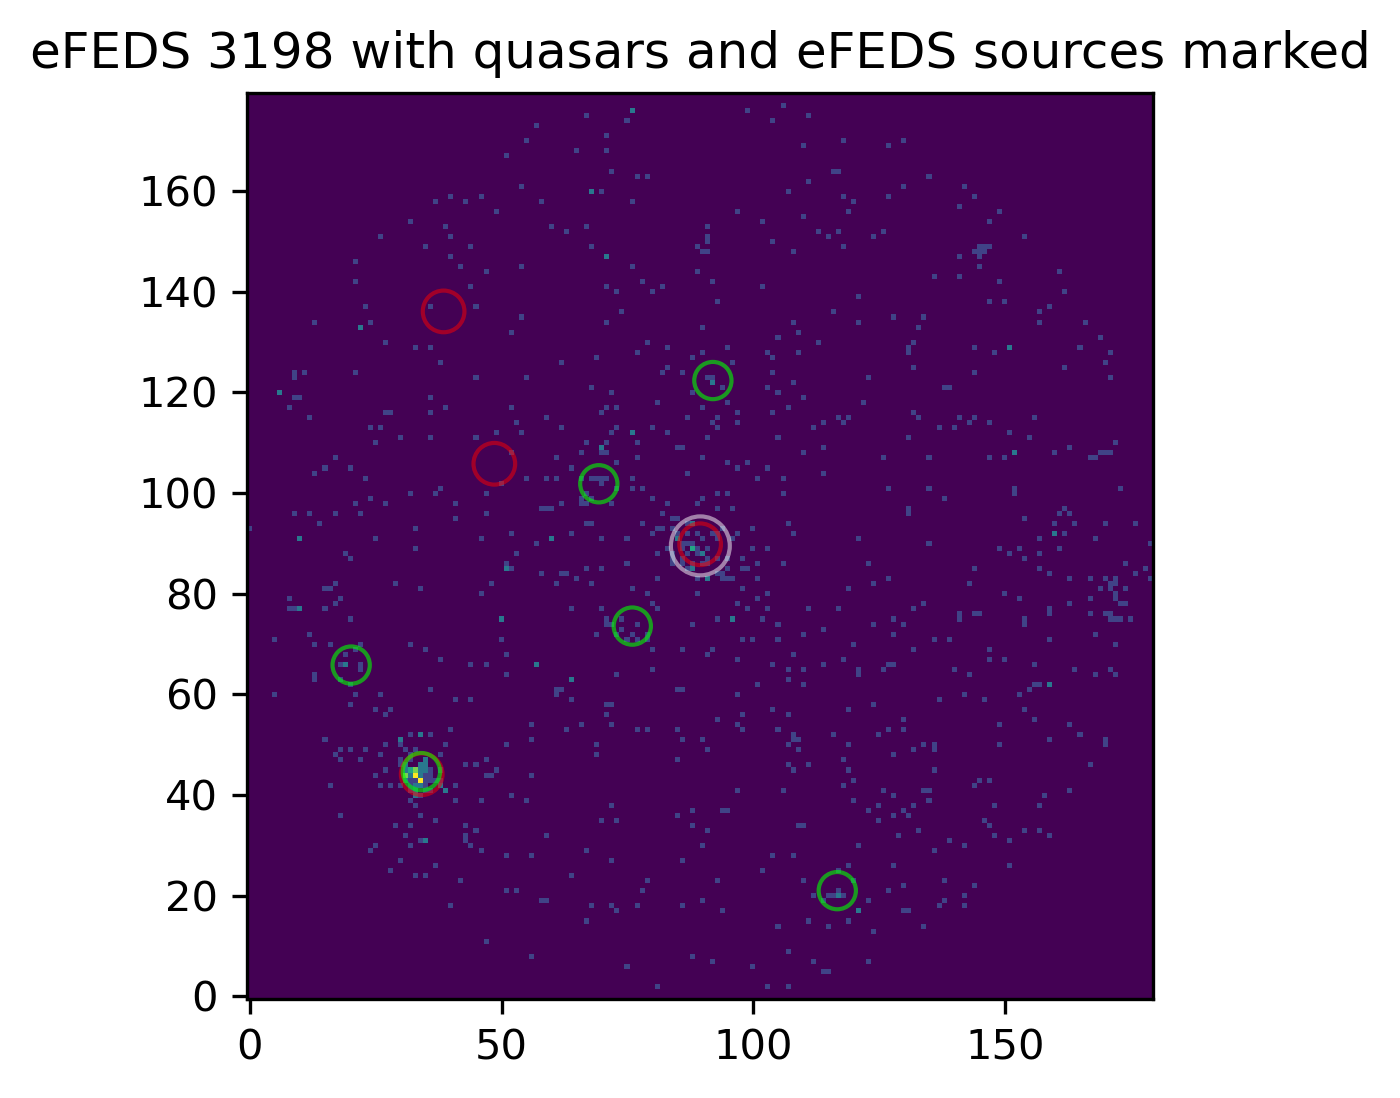

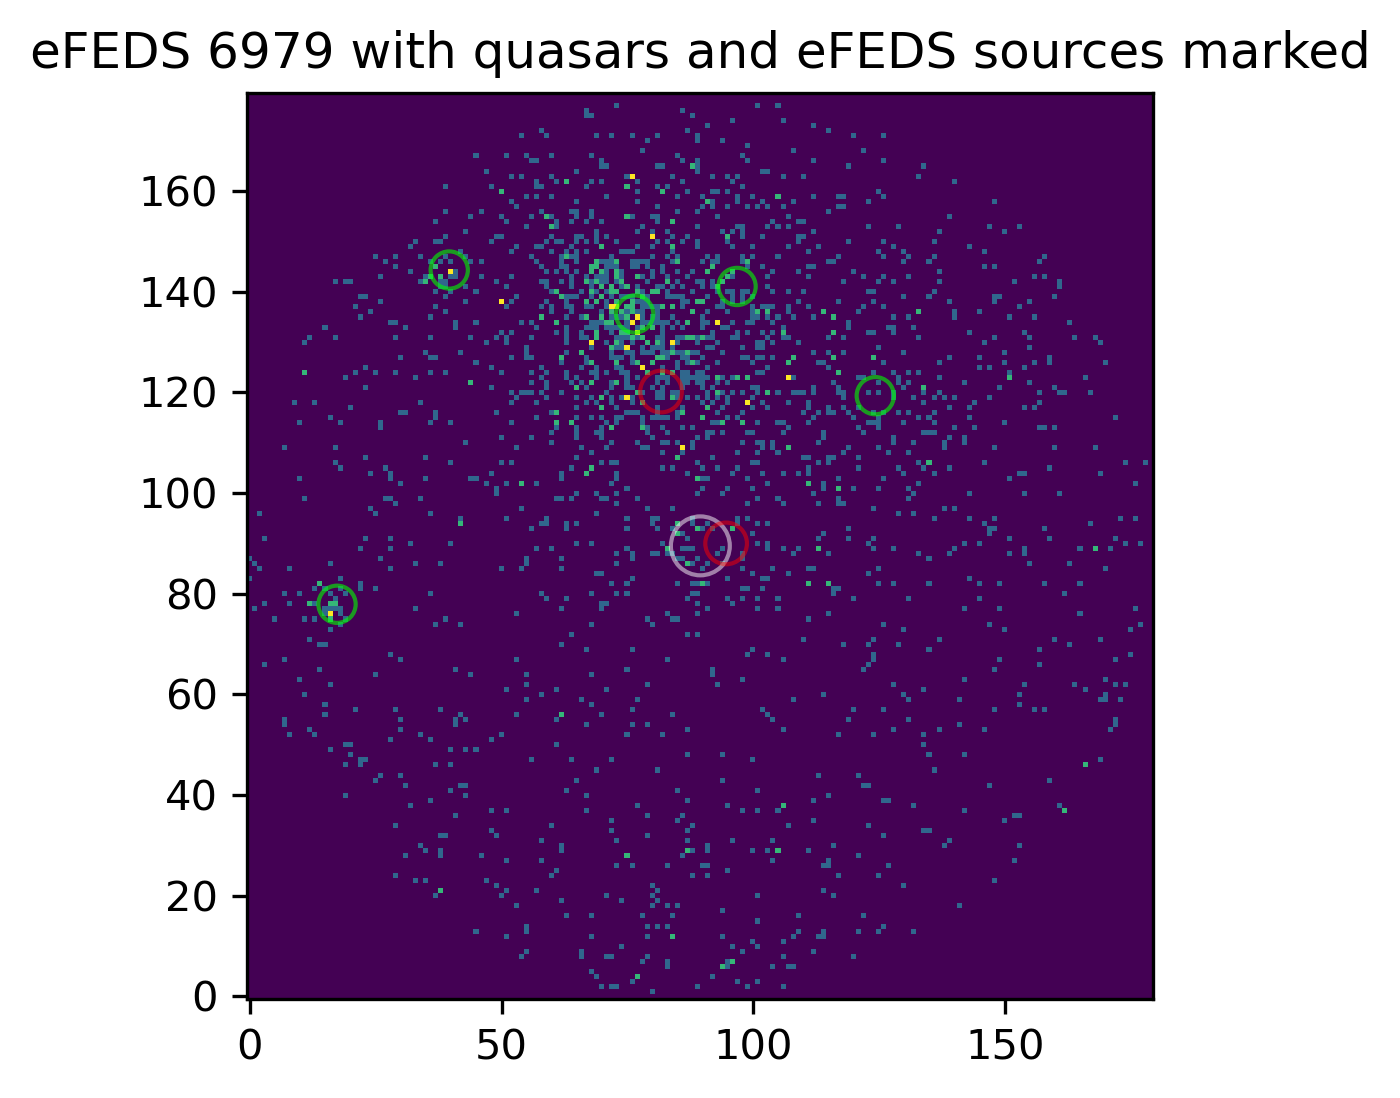

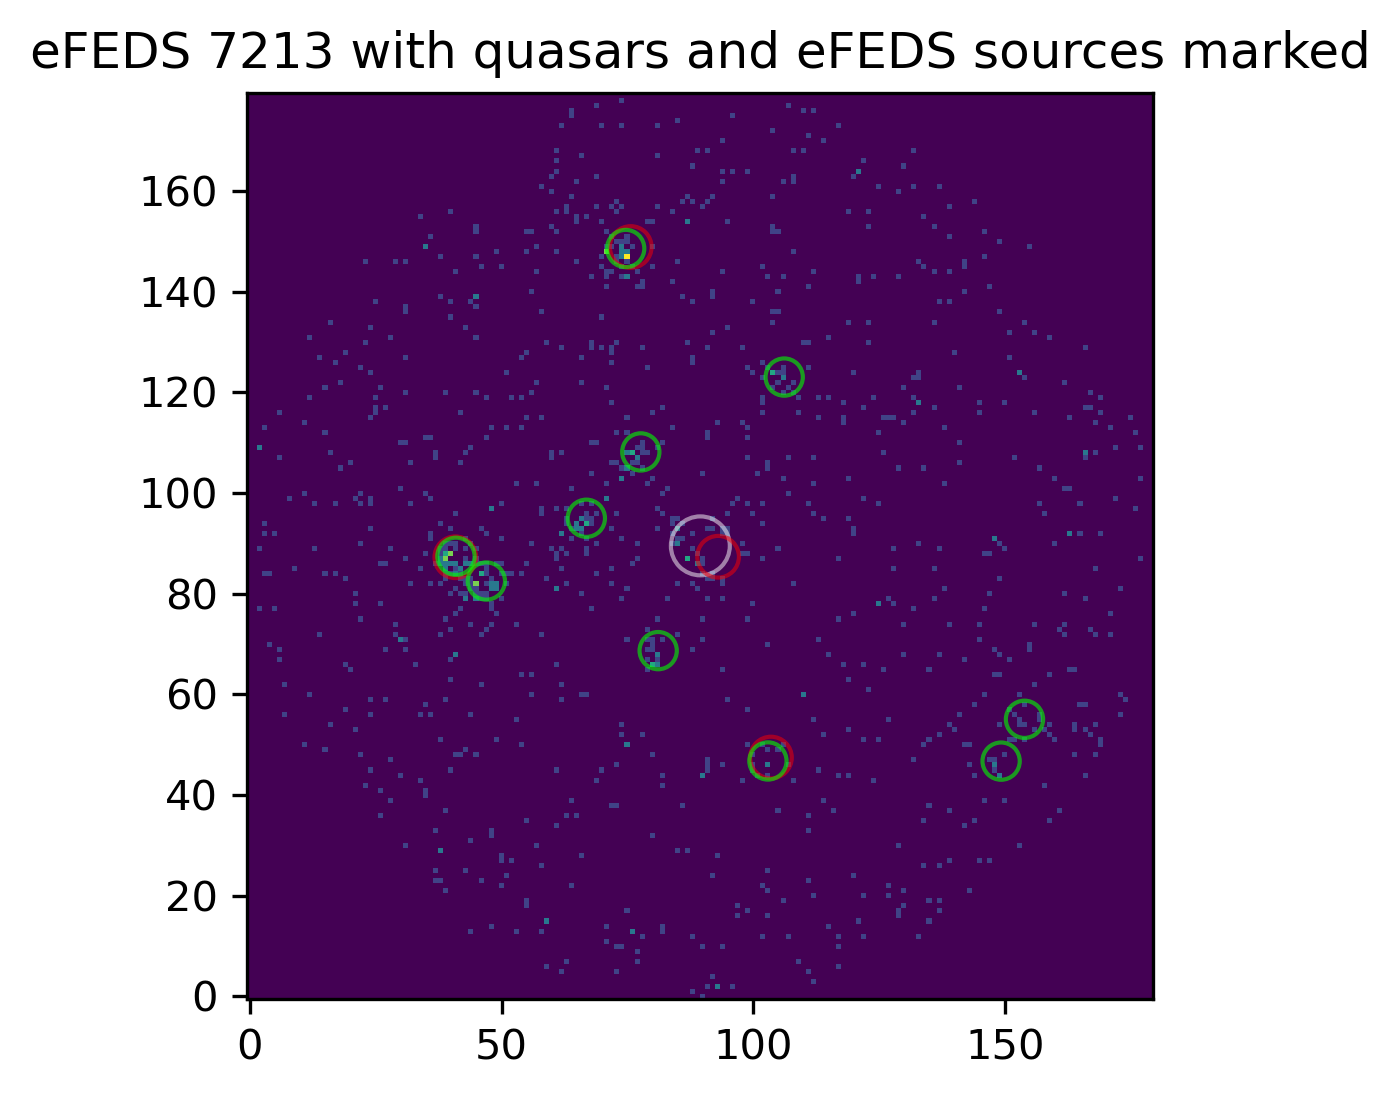

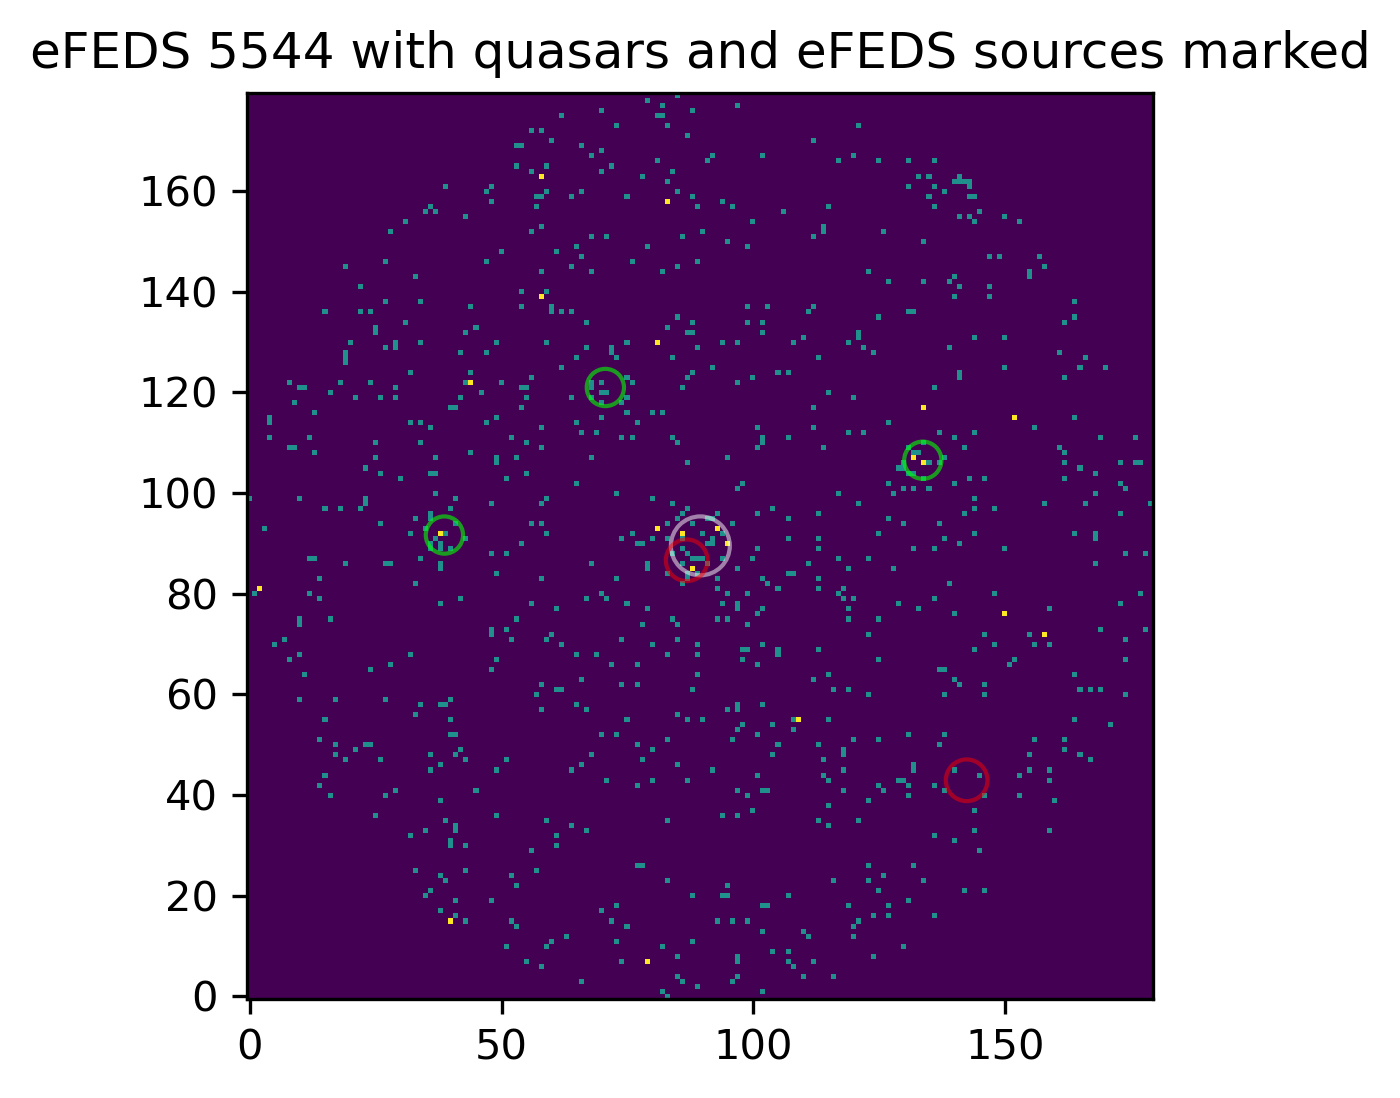

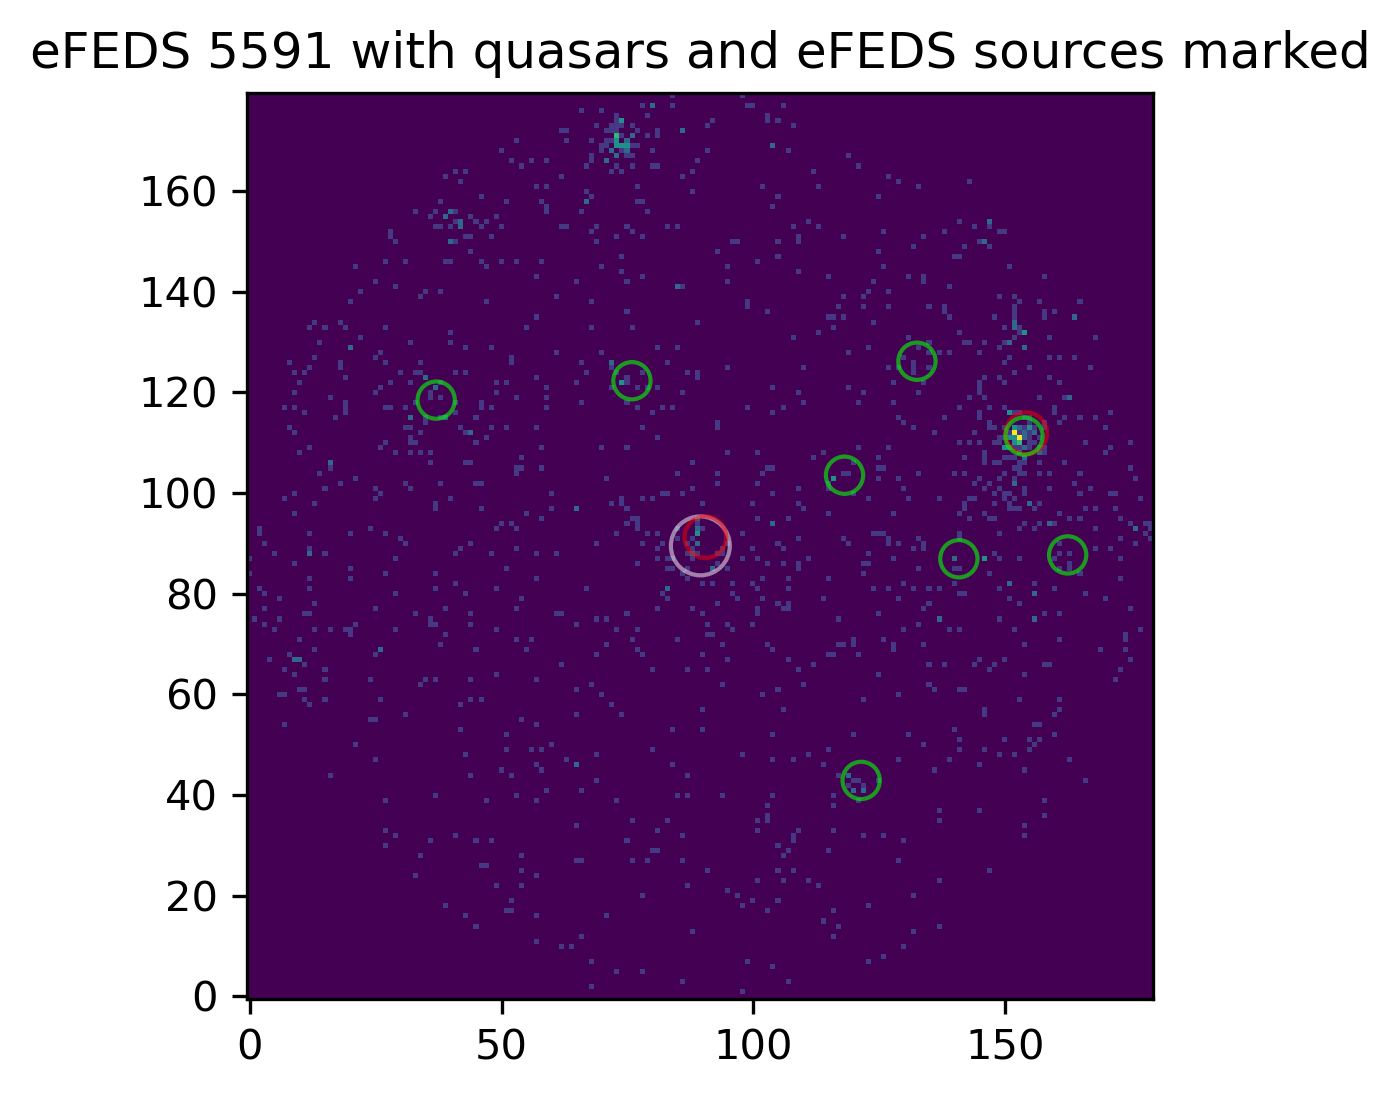

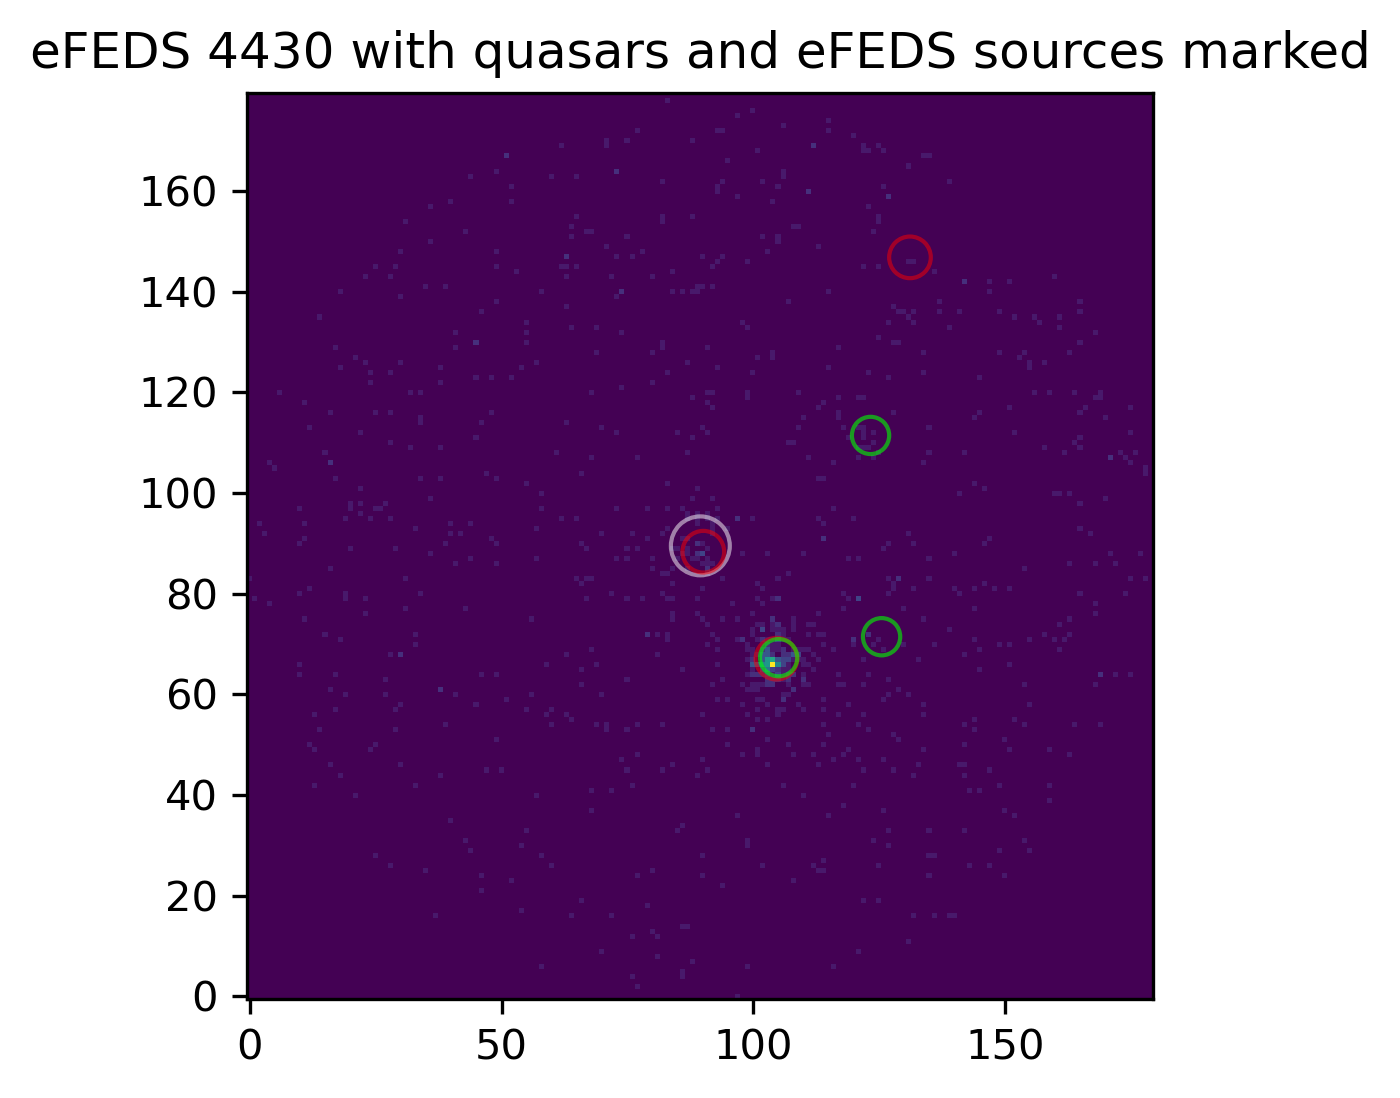

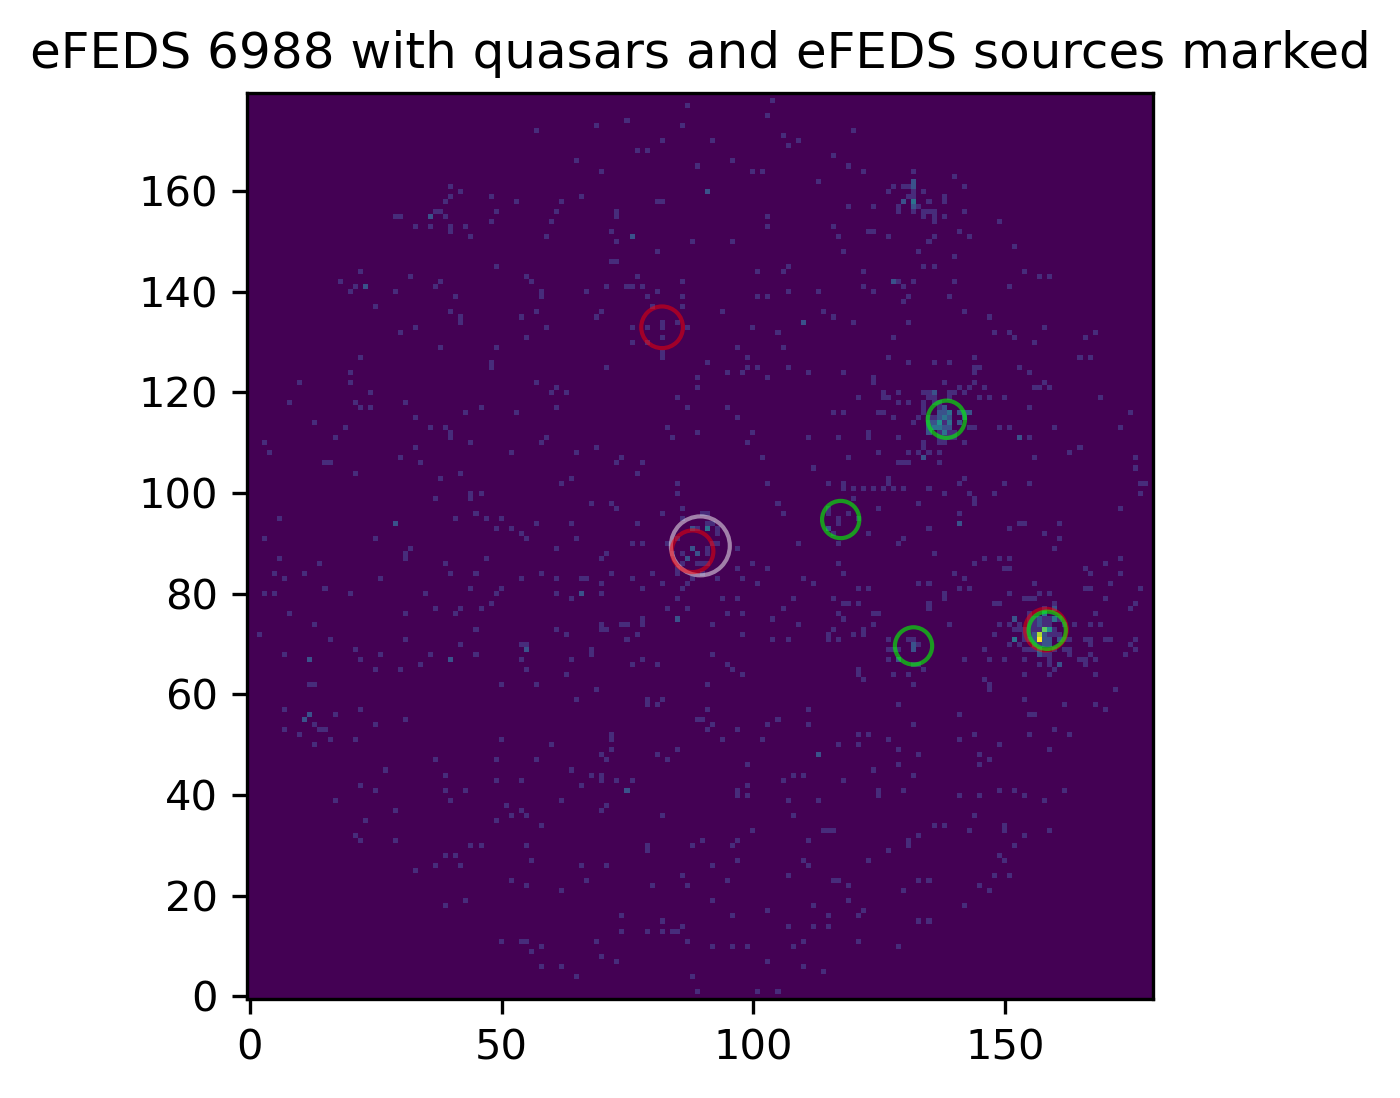

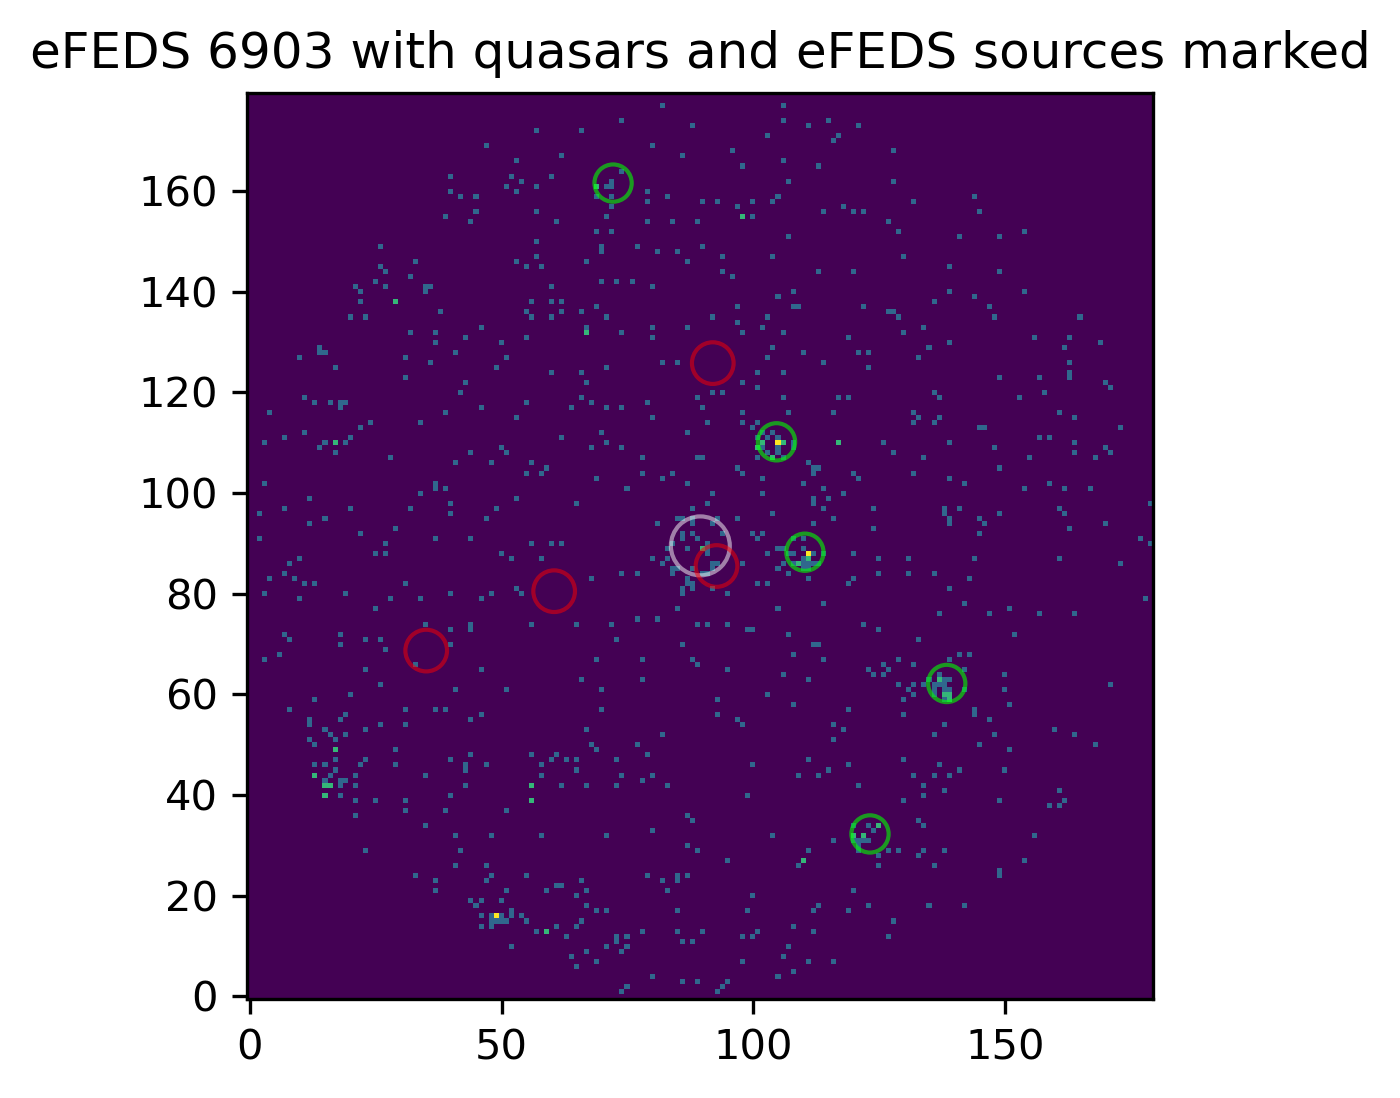

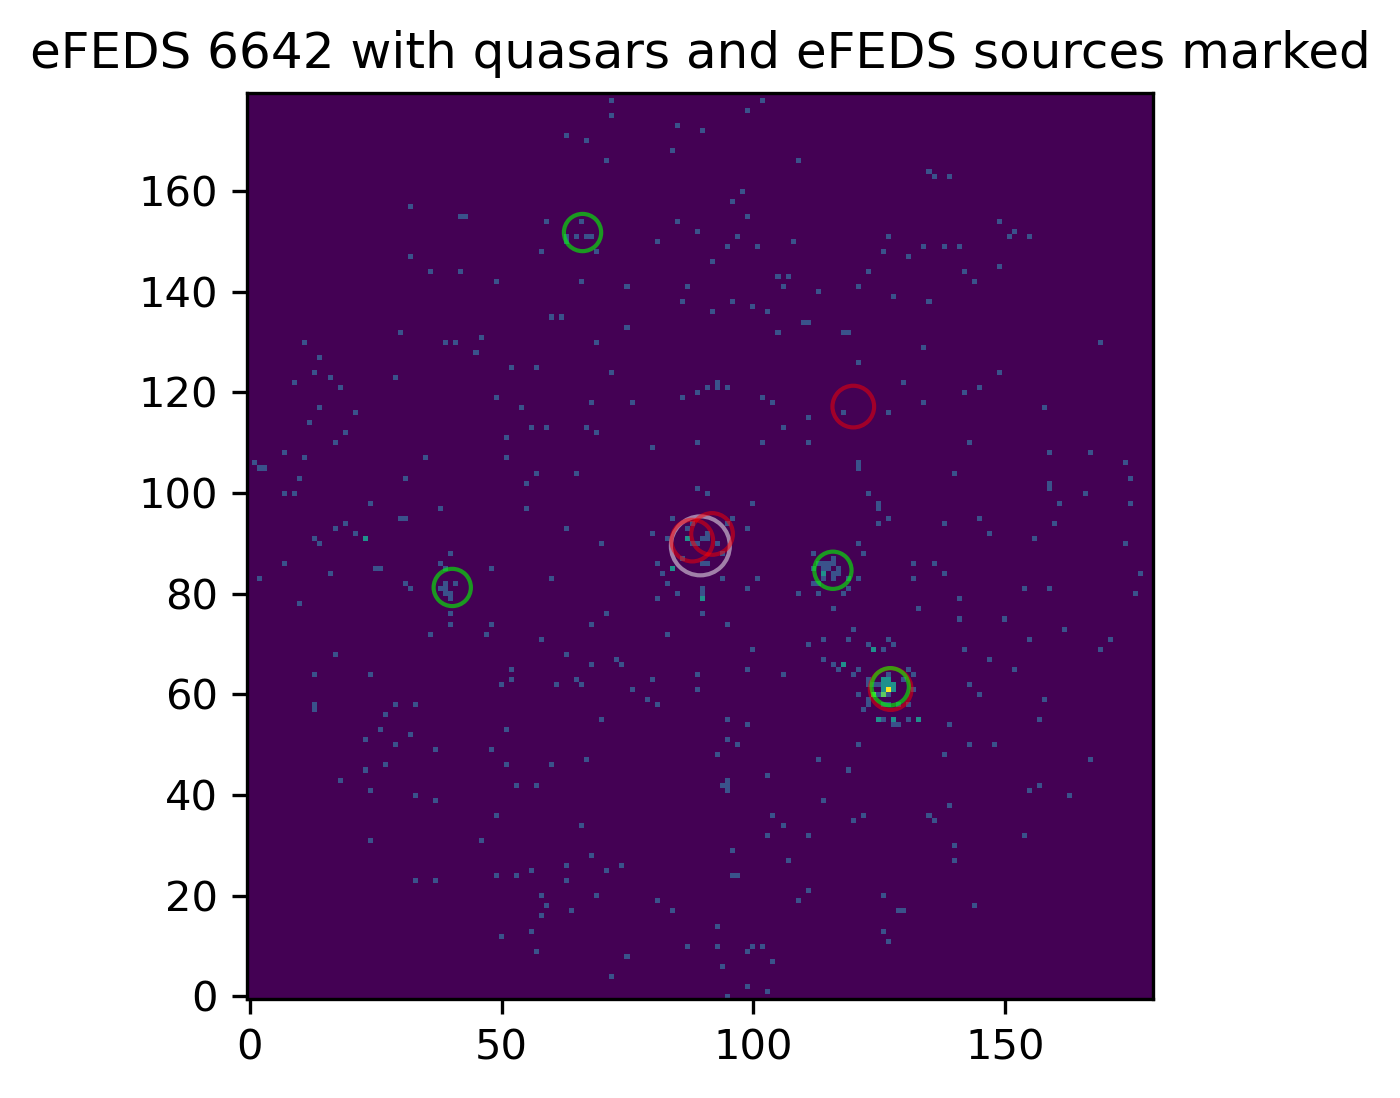

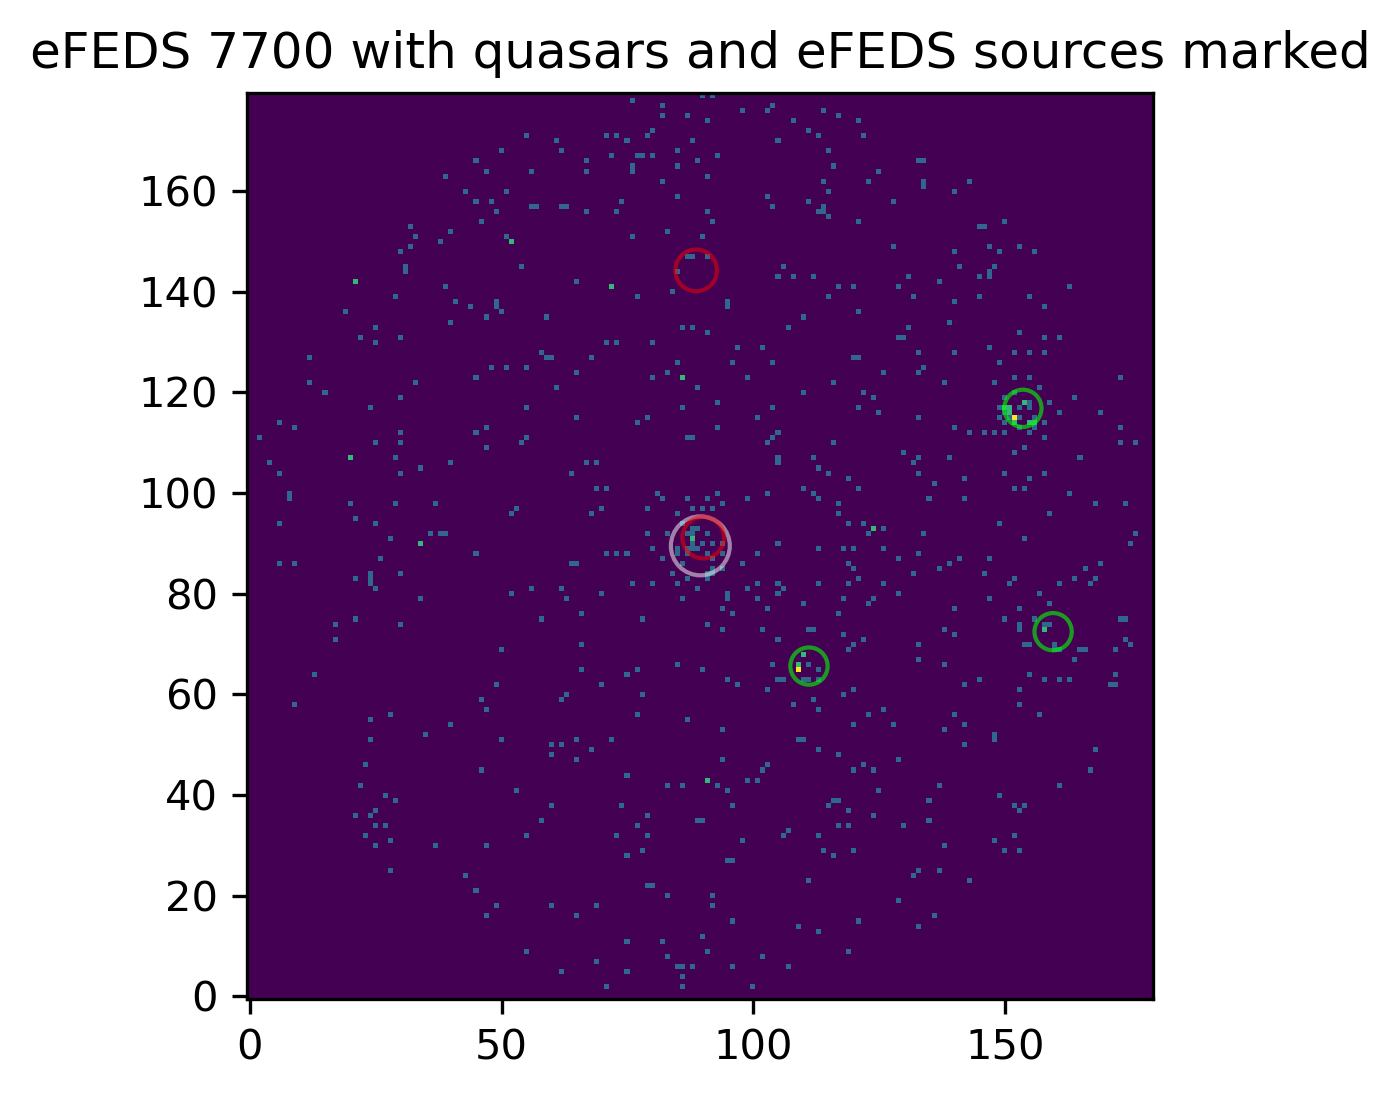

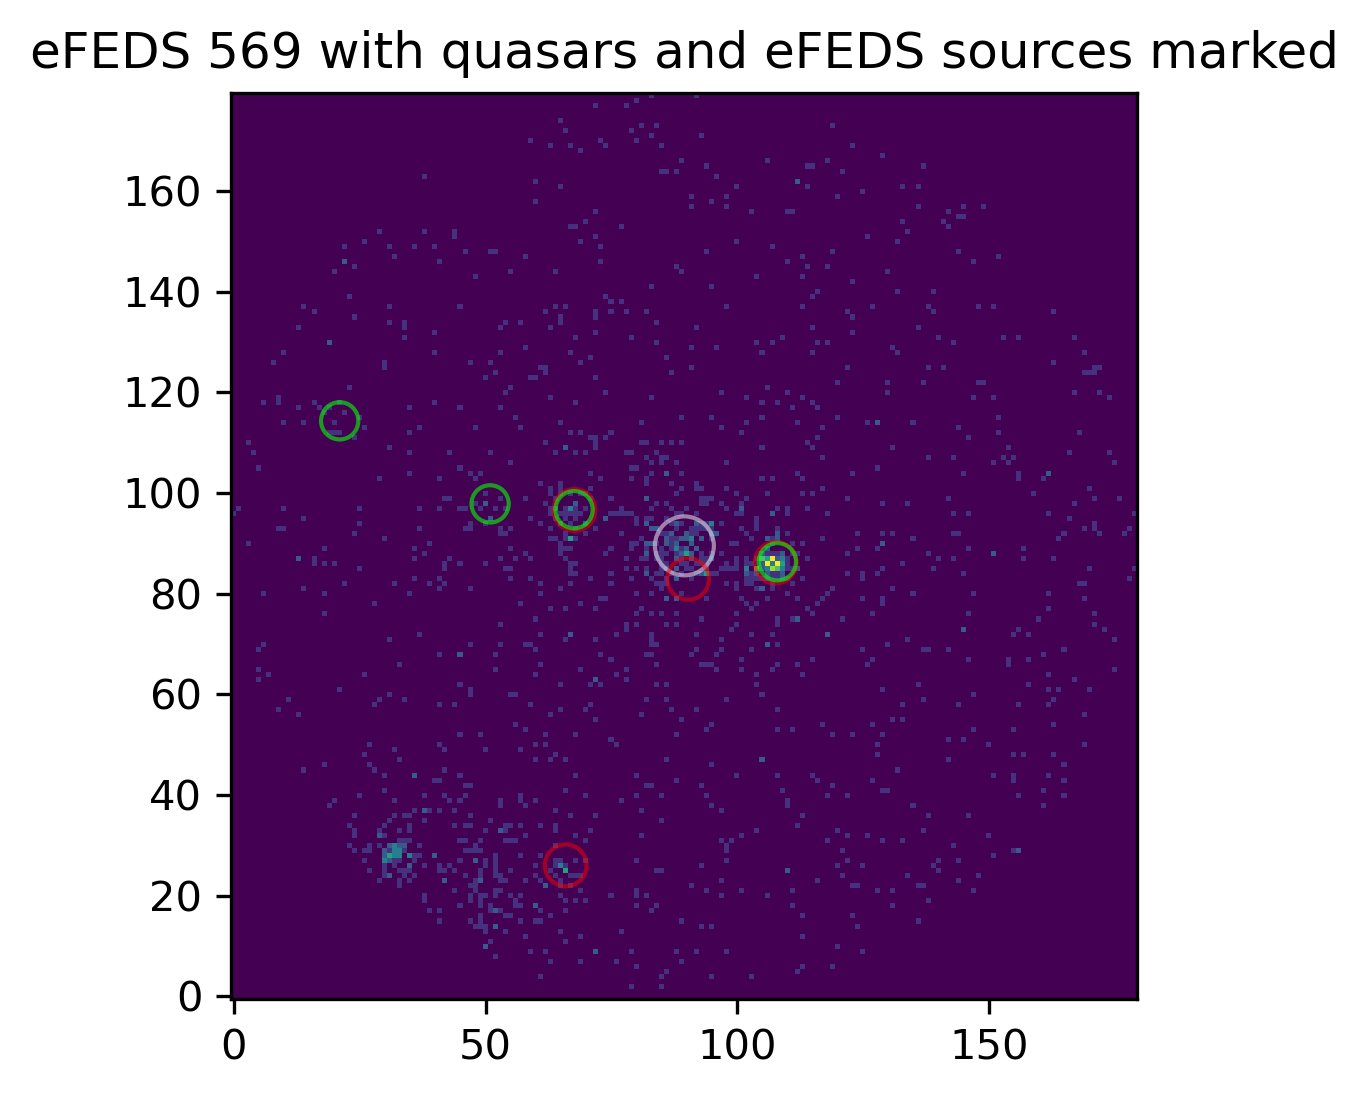

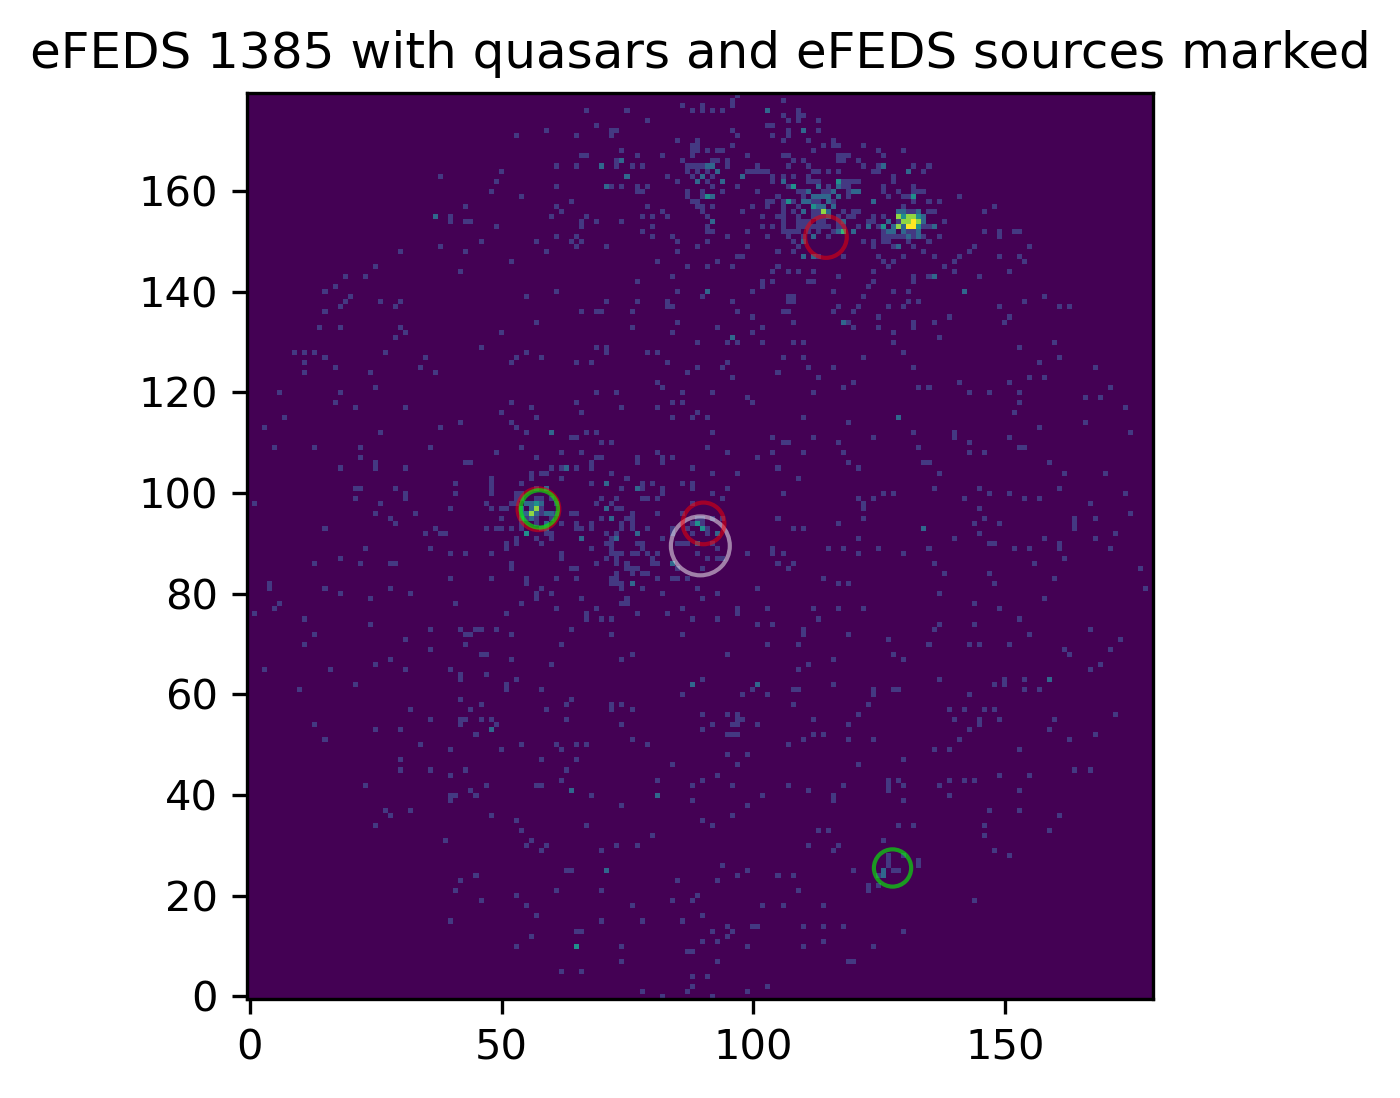

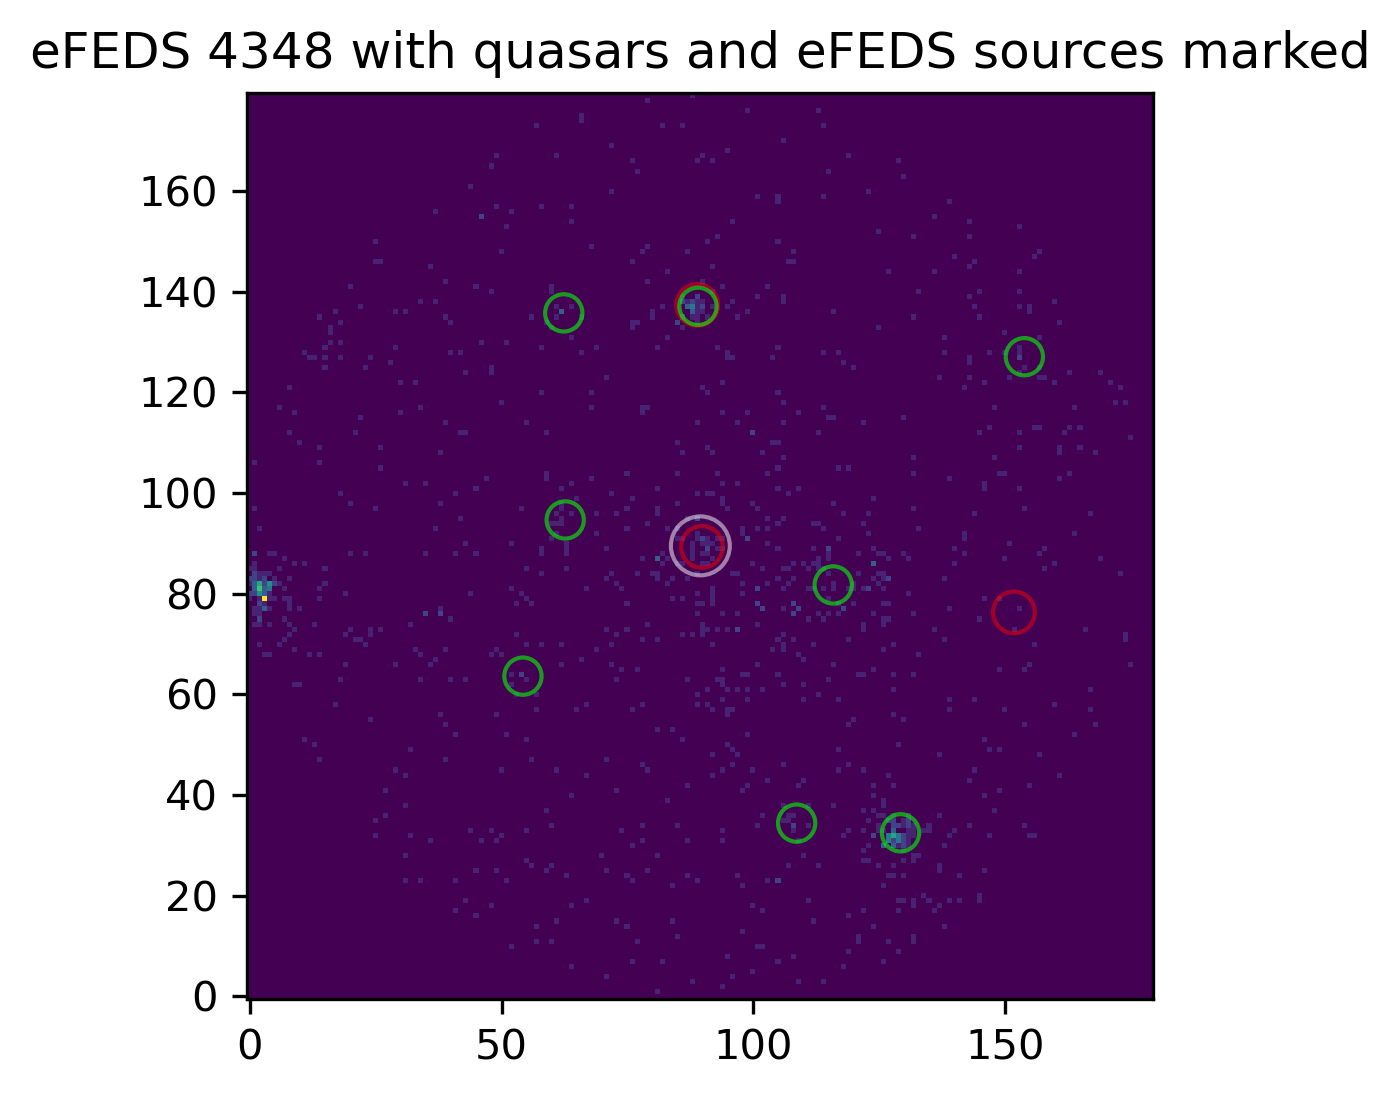

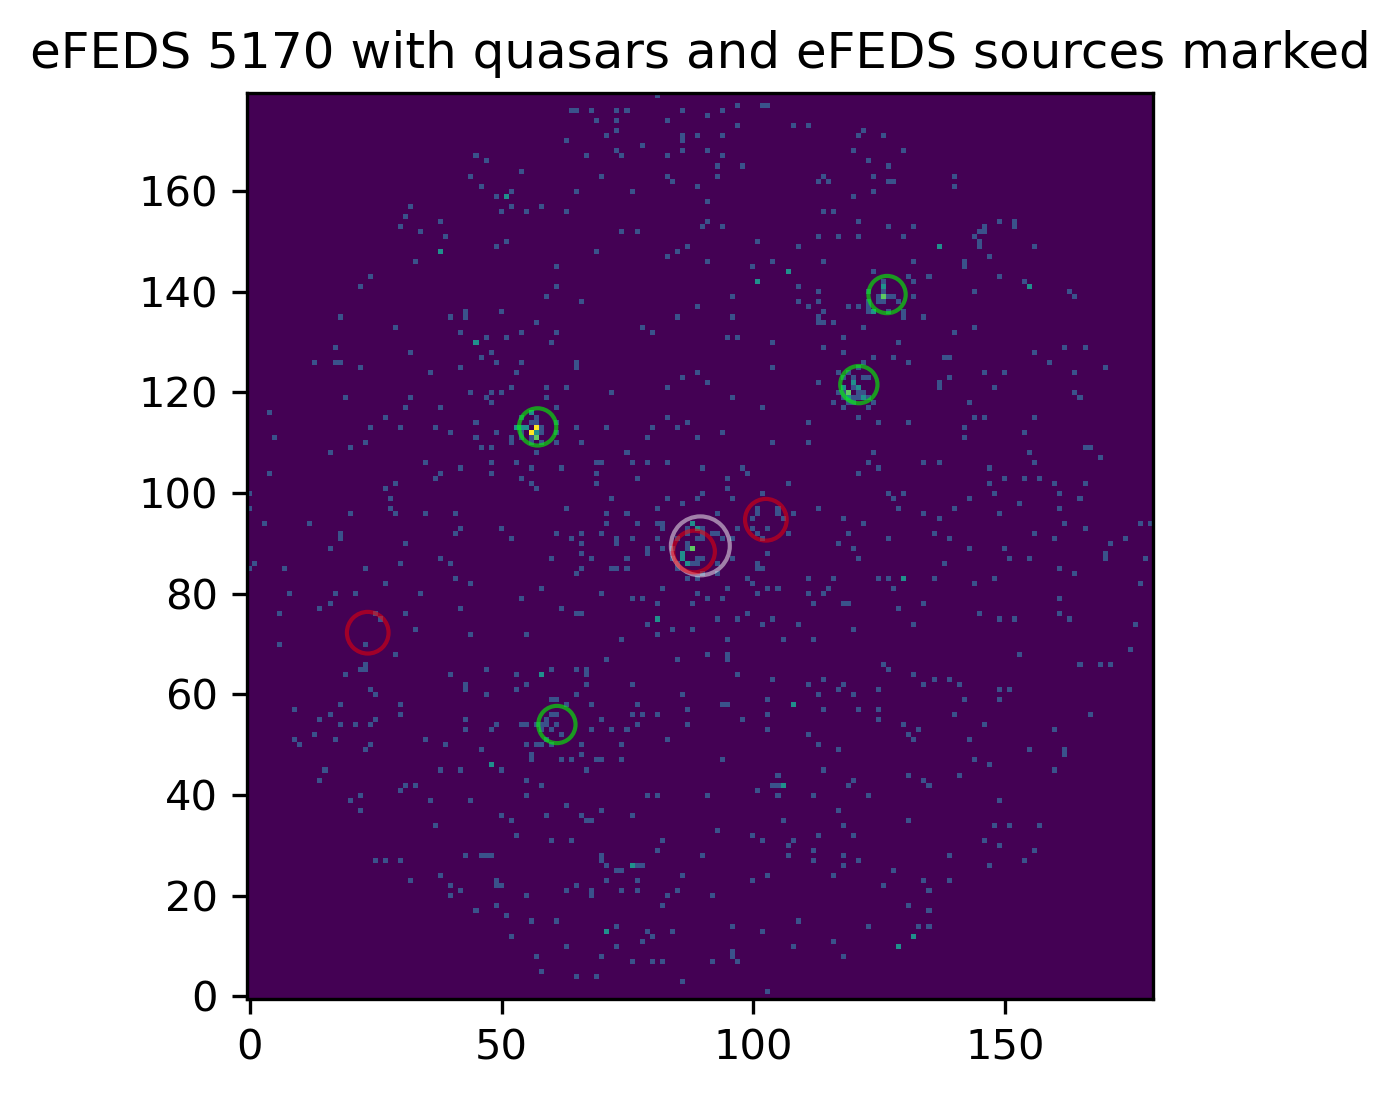

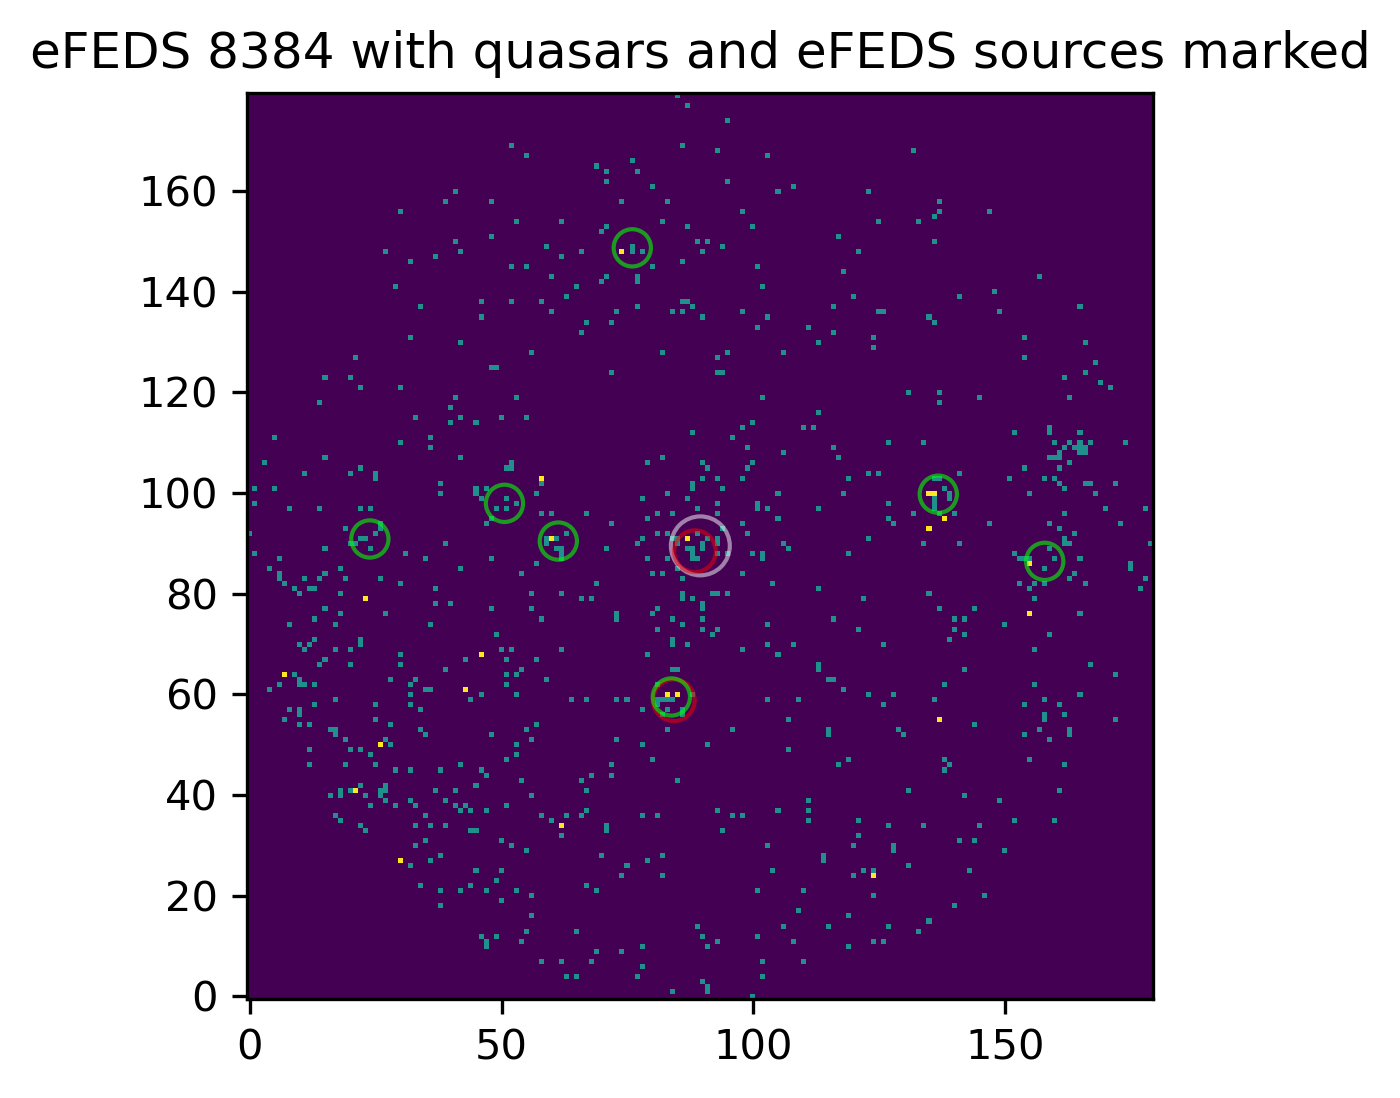

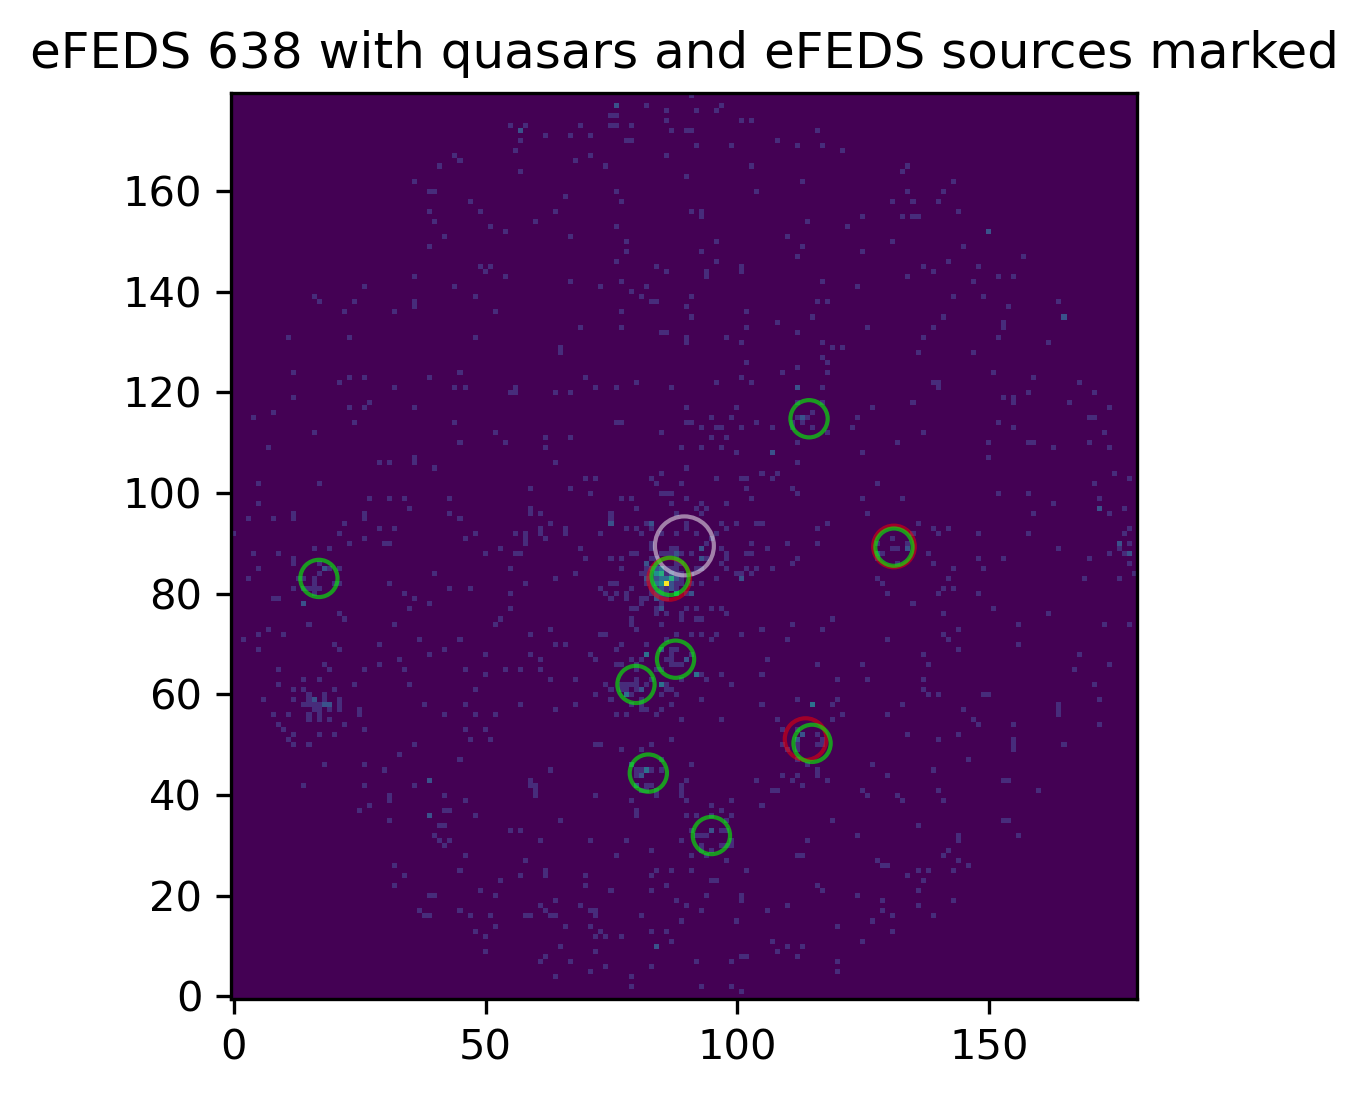

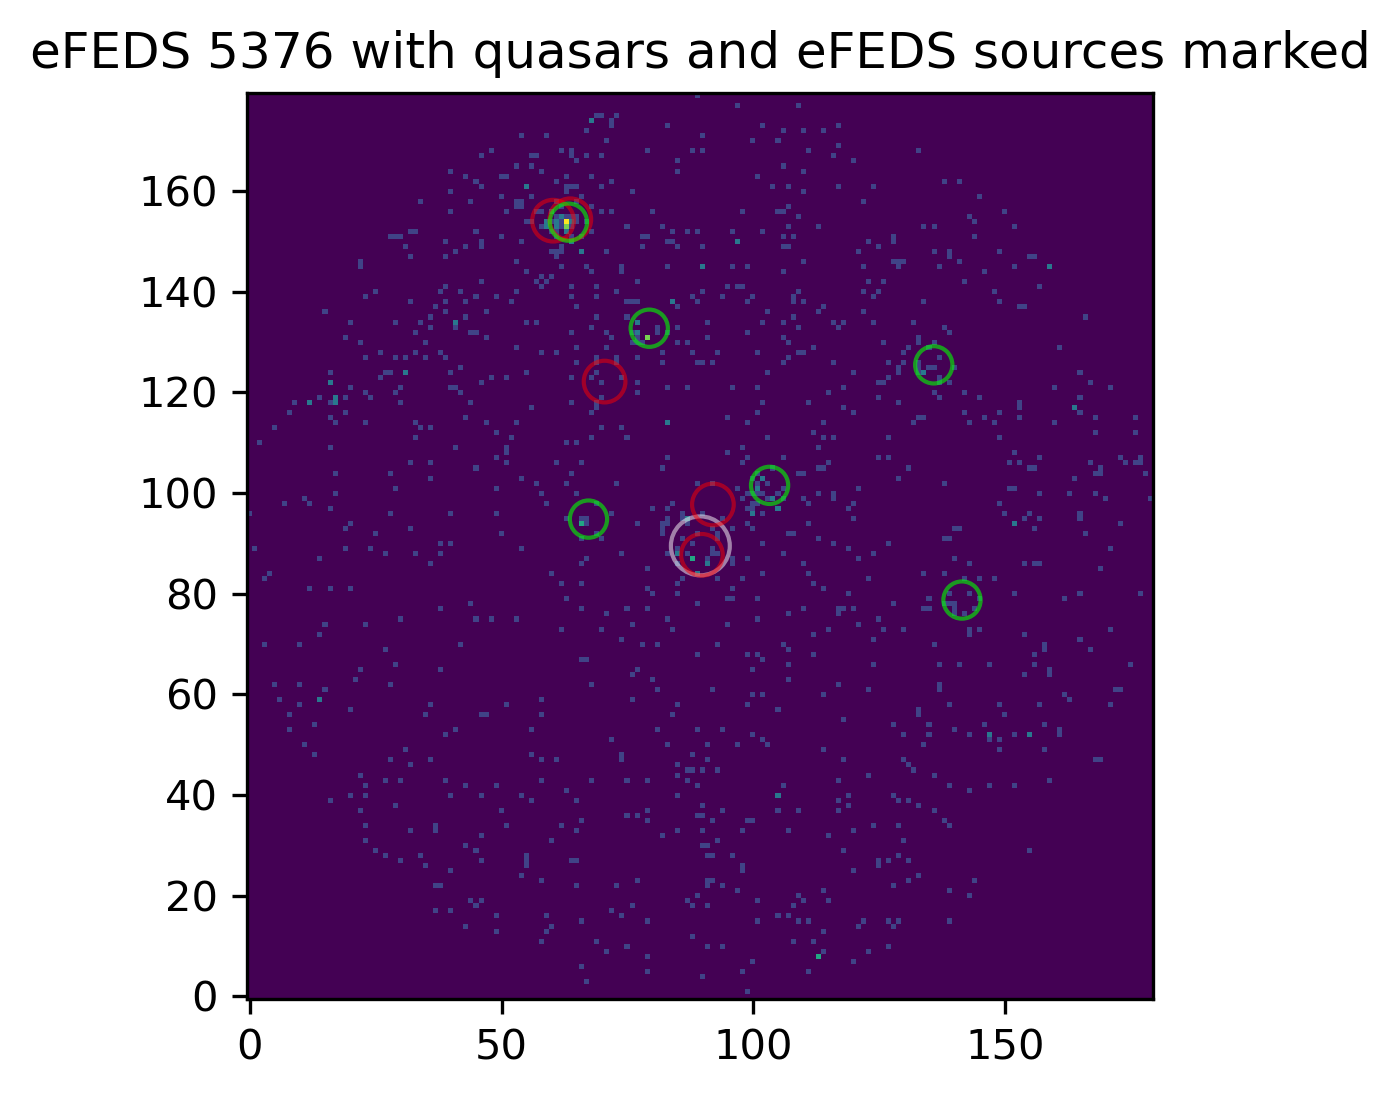

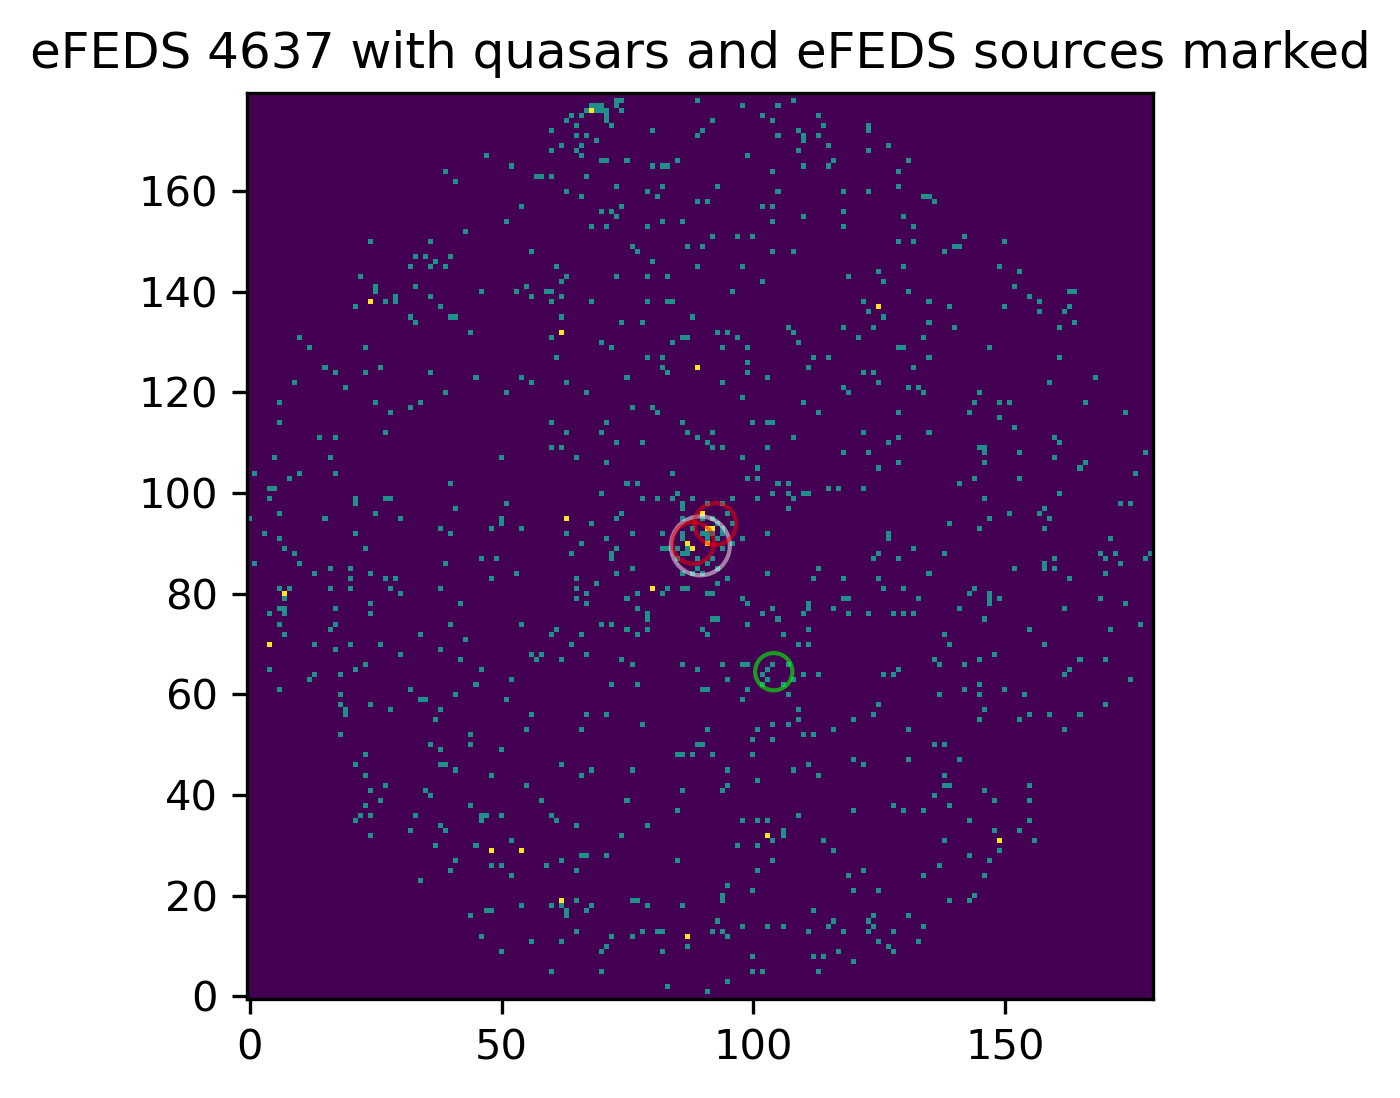

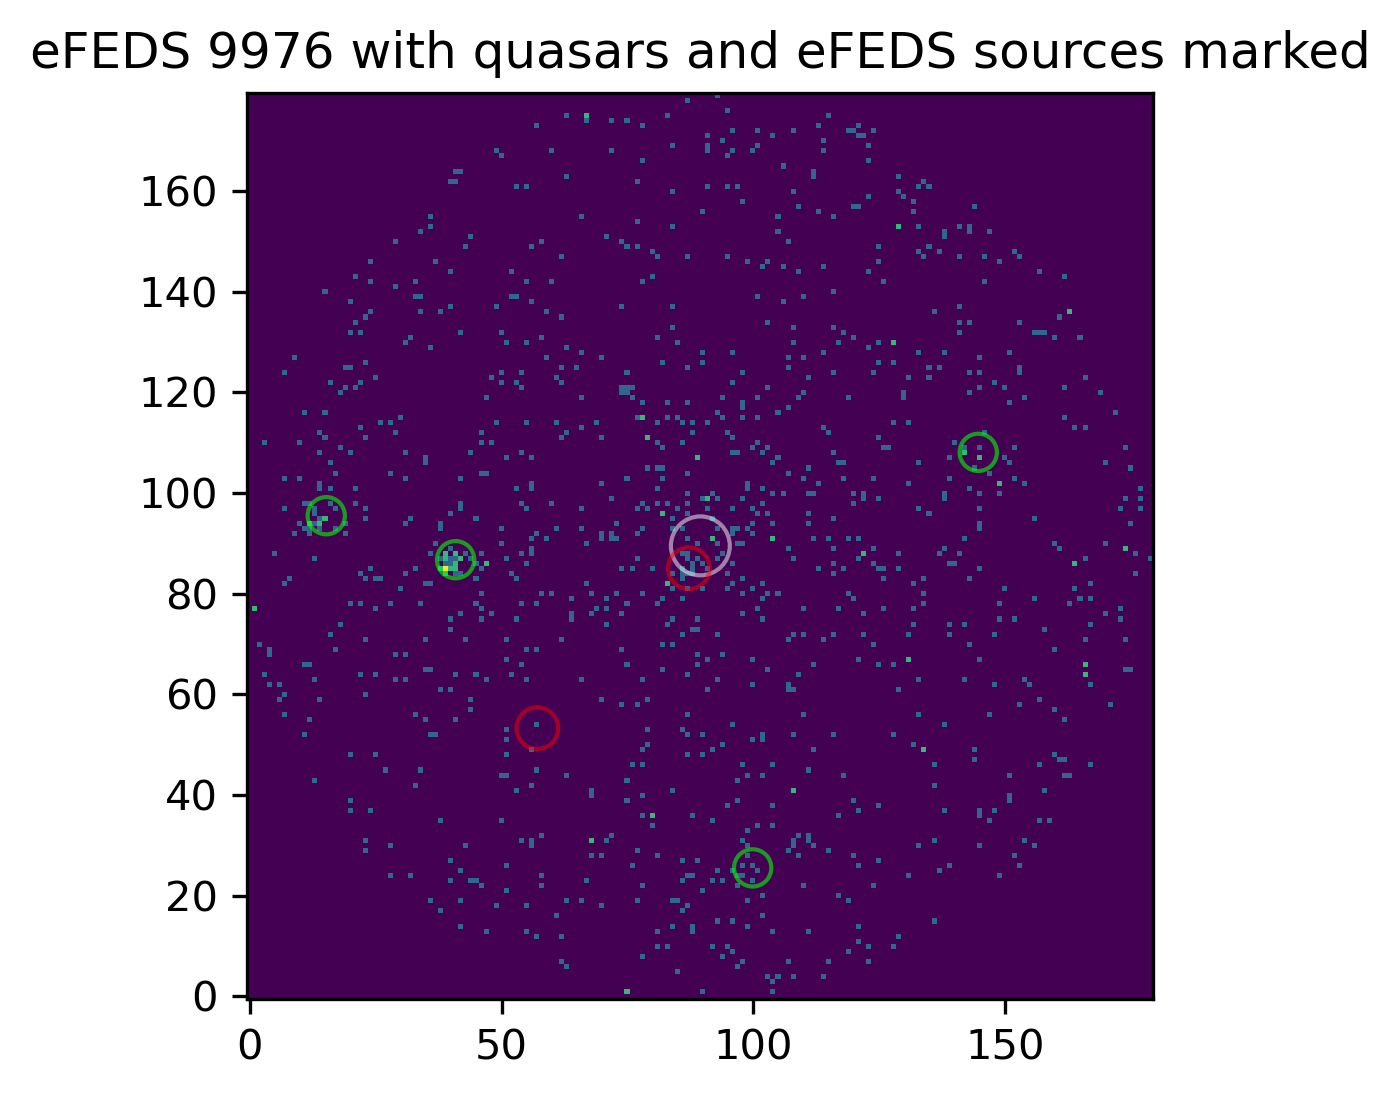

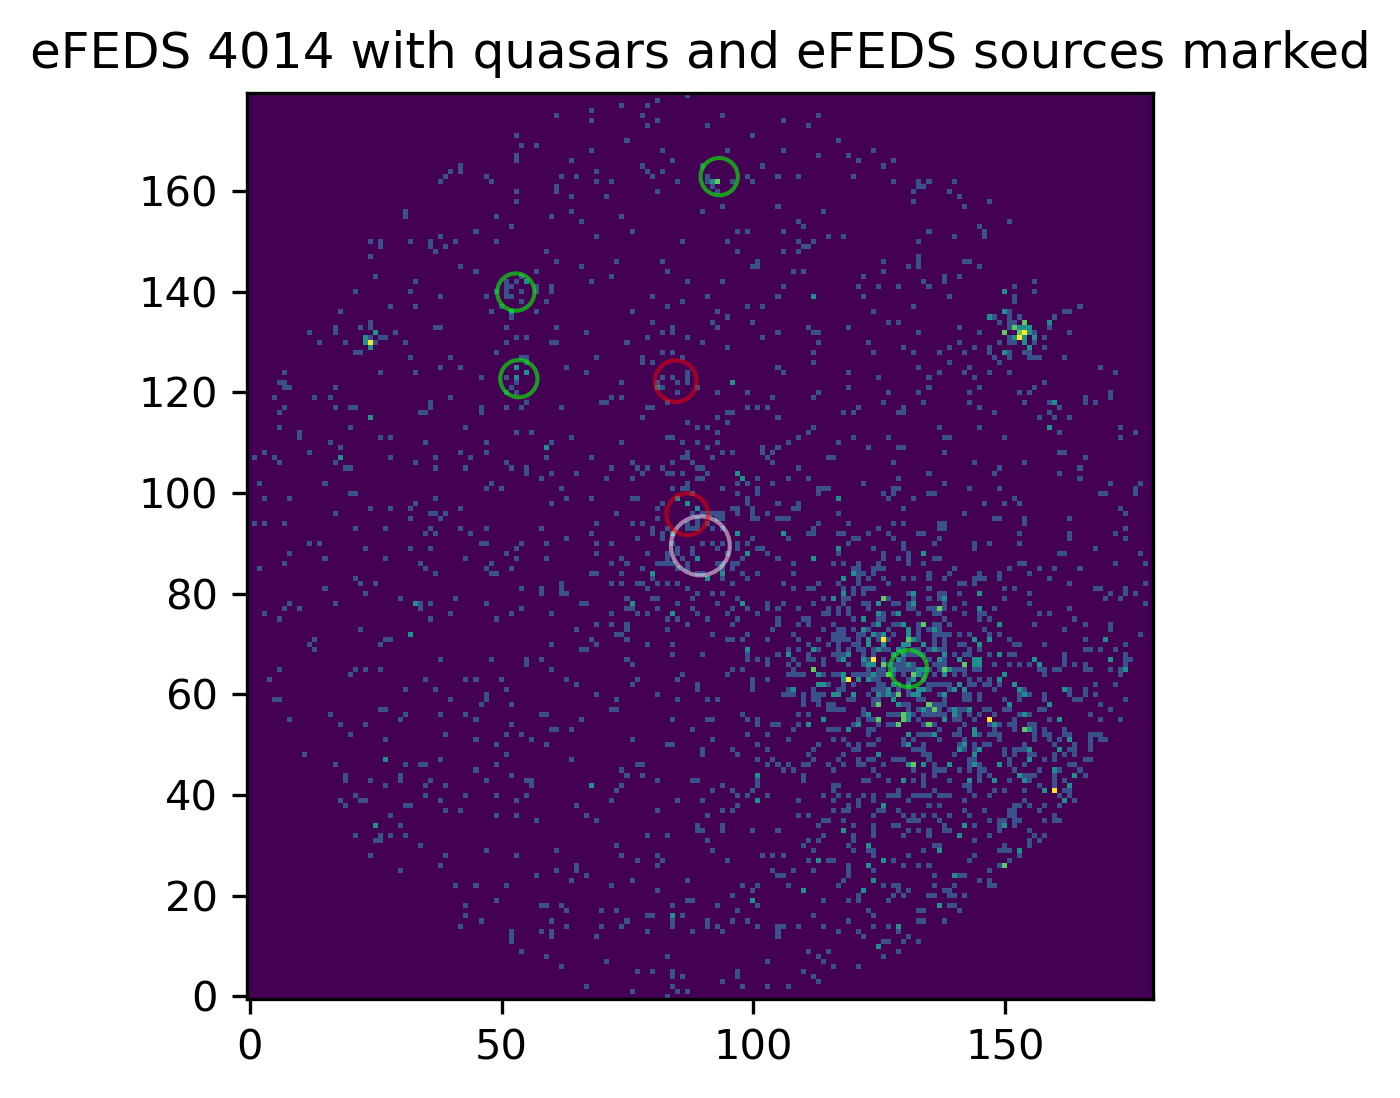

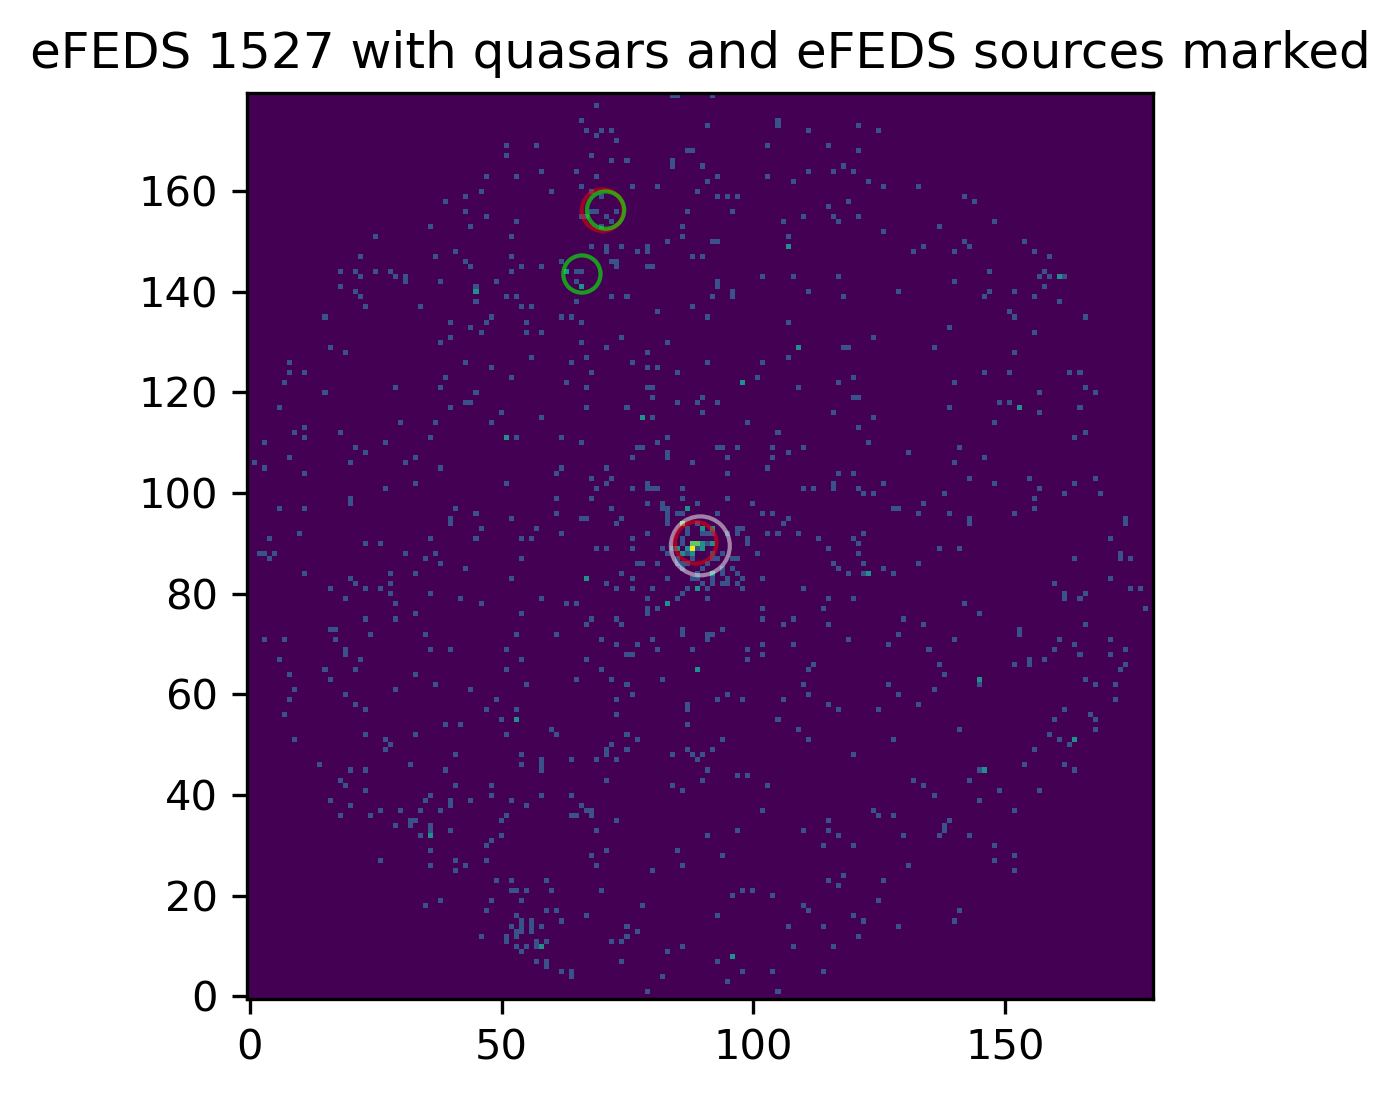

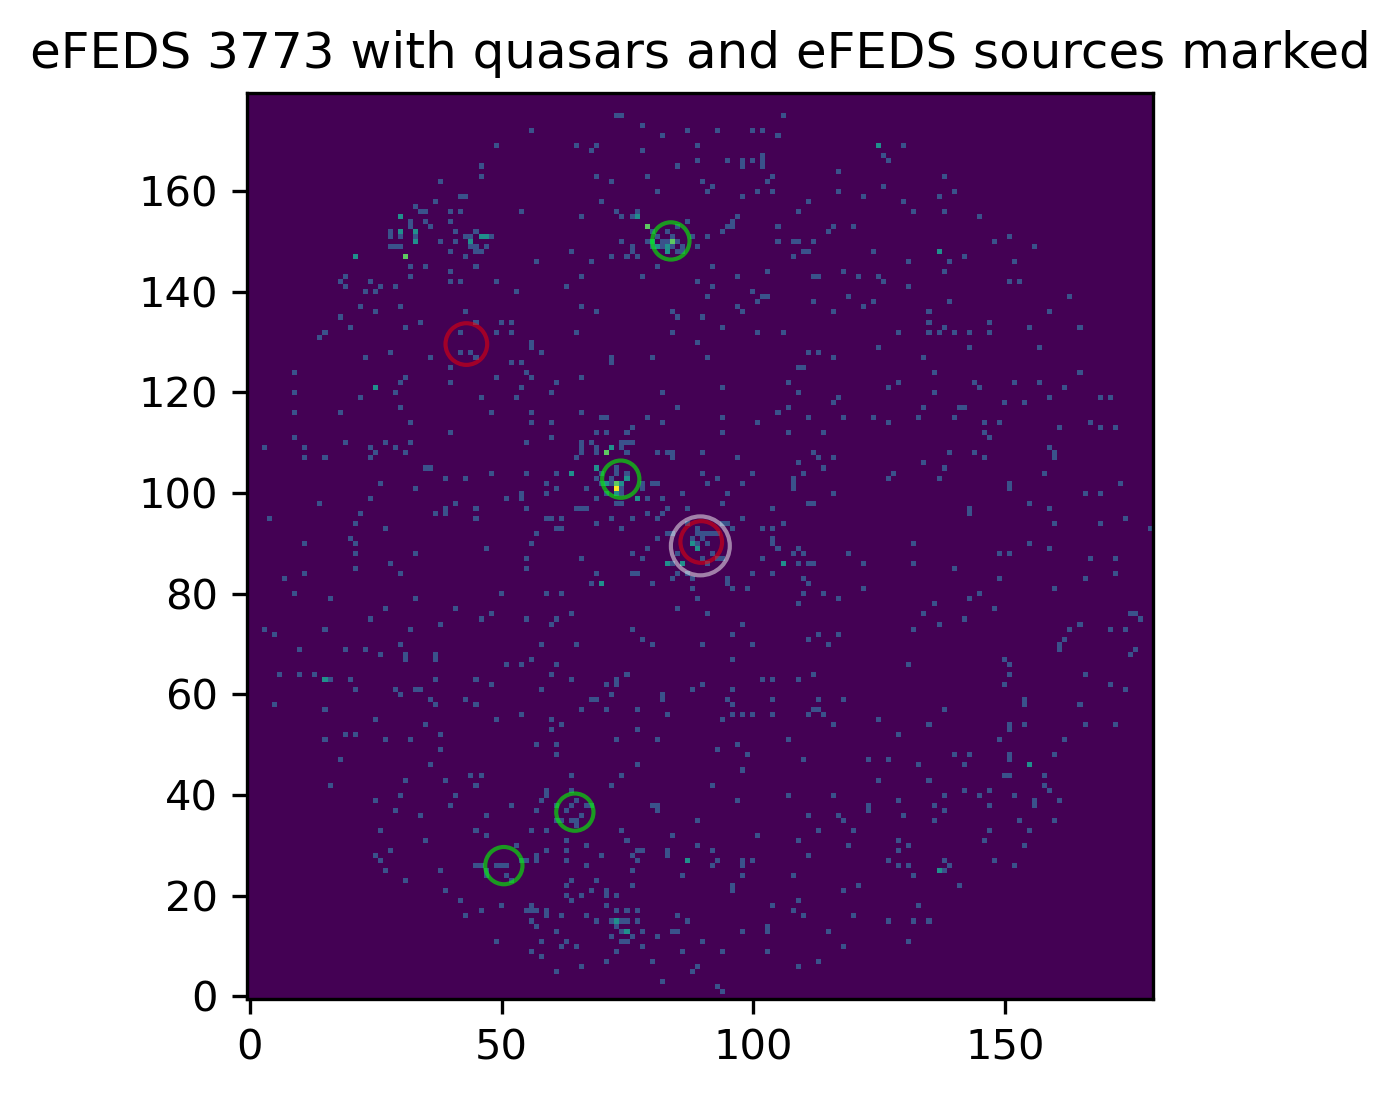

In [15]:
current_id = None
for id in matches_table["clus_ID_SRC"]:
    if id == current_id:
        continue
    current_id = id
    mark_image_eFEDS(id, make_save=True)
